#Inheritance - Part 2
**How would you design and implement placing order with the details of all the products bought?**

#Composition
Modelling instances of one class as attributes of another class is called **Composition**

In [1]:
class Product:

    def __init__(self, name, price, deal_price, ratings):
       self.name = name
       self.price = price
       self.deal_price = deal_price
       self.ratings = ratings
       self.you_save = price - deal_price

    def display_product_details(self):
           print("Product: {}".format(self.name))
           print("Price: {}".format(self.price))
           print("Deal Price: {}".format(self.deal_price))
           print("You Saved: {}".format(self.you_save))
           print("Ratings: {}".format(self.ratings))

    def get_deal_price(self):
        return self.deal_price

class ElectronicItem(Product):
   def set_warranty(self, warranty_in_months):
       self.warranty_in_months = warranty_in_months

   def get_warranty(self):
       return self.warranty_in_months

class GroceryItem(Product):
    pass

class Order:
    def __init__(self, delivery_speed, delivery_address):
         self.items_in_cart = []
         self.delivery_speed = delivery_speed
         self.delivery_address = delivery_address

    def add_item(self, product, quantity):
        self.items_in_cart.append((product, quantity))

    def display_order_details(self):
        for product, quantity in self.items_in_cart:
            product.display_product_details()
            print("Quantity: {}".format(quantity))

    def display_total_bill(self):
        total_bill = 0
        for product, quantity in self.items_in_cart:
             price = product.get_deal_price() * quantity
             total_bill += price
        print("Total Bill: {}".format(total_bill))

milk = GroceryItem("Milk",40, 25, 3.5)
tv = ElectronicItem("TV",45000, 40000, 3.5)
order = Order("Prime Delivery", "Hyderabad")
order.add_item(milk, 2)
order.add_item(tv, 1)
order.display_order_details()
order.display_total_bill()

Product: Milk
Price: 40
Deal Price: 25
You Saved: 15
Ratings: 3.5
Quantity: 2
Product: TV
Price: 45000
Deal Price: 40000
You Saved: 5000
Ratings: 3.5
Quantity: 1
Total Bill: 40050


In the above example, we are modelling **Product** as attribute of **Order**

##Overriding Methods
Sometimes, we require a method in the instances of a sub class to behave differently from the method in instance of a superclass.

In [2]:
class Product:

  def __init__(self, name, price, deal_price, ratings):
    self.name = name
    self.price = price
    self.deal_price = deal_price
    self.ratings = ratings
    self.you_save = price - deal_price

  def display_product_details(self):
      print("Product: {}".format(self.name))
      print("Price: {}".format(self.price))
      print("Deal Price: {}".format(self.deal_price))
      print("You Saved: {}".format(self.you_save))
      print("Ratings: {}".format(self.ratings))

  def get_deal_price(self):
    return self.deal_price

class ElectronicItem(Product):

  def display_product_details(self):
    # self.display_product_details()
    print("Warranty {} months".format(self.warranty_in_months))

  def set_warranty(self, warranty_in_months):
    self.warranty_in_months = warranty_in_months

  def get_warranty(self):
    return self.warranty_in_months

e = ElectronicItem("Laptop",45000, 40000,3.5)
e.set_warranty(10)
e.display_product_details()

Warranty 10 months


Because `self.display_product_details()` in ElectronicItem class does not call the method in the superclass.

#Super
##Accessing Super Class’s Method
`super()` allows us to call methods of the superclass (Product) from the subclass.

Instead of writing and methods to access and modify warranty we can override `__init__`

Let's add warranty of ElectronicItem.

In [4]:
class Product:

  def __init__(self, name, price, deal_price, ratings):
    self.name = name
    self.price = price
    self.deal_price = deal_price
    self.ratings = ratings
    self.you_save = price - deal_price

  def display_product_details(self):
      print("Product: {}".format(self.name))
      print("Price: {}".format(self.price))
      print("Deal Price: {}".format(self.deal_price))
      print("You Saved: {}".format(self.you_save))
      print("Ratings: {}".format(self.ratings))

  def _get_deal_price(self):
    return self.deal_price

class ElectronicItem(Product):

  def display_product_detailsq(self):
    self.display_product_details()
    print("Warranty {} months".format(self.warranty_in_months))

  def set_warranty(self, warranty_in_months):
    self.warranty_in_months = warranty_in_months

  def get_warranty(self):
    return self.warranty_in_months

e = ElectronicItem("Laptop",45000, 40000,3.5)
e.set_warranty(10)
e.display_product_detailsq()

Product: Laptop
Price: 45000
Deal Price: 40000
You Saved: 5000
Ratings: 3.5
Warranty 10 months


##MultiLevel Inheritance
We can also inherit from a subclass. This is called **MultiLevel Inheritance**.

We can continue such inheritance to any depth in Python.


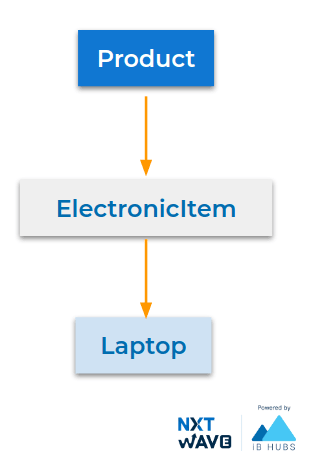

In [ ]:
class Product:
    pass

class ElectronicItem(Product):
    pass

class Laptop(ElectronicItem):
    pass

#Inheritance & Composition
##When to use Inheritance?
Prefer modeling with inheritance when the classes have an **IS-A** relationship.

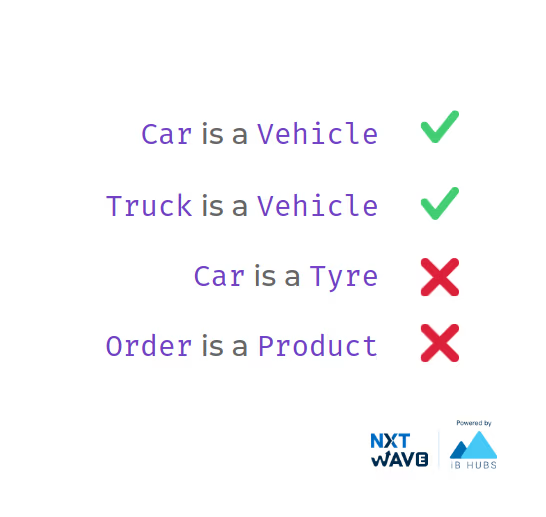


##When to use Composition?
Prefer modeling with composition when the classes have a **HAS-A** relationship.

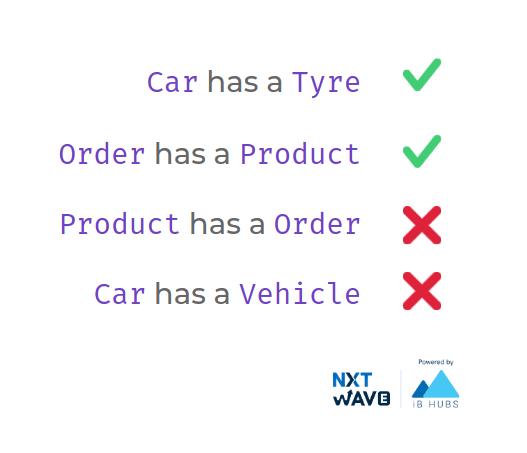

In [12]:
# Truck class should have the following attributes & methods
#
# Old Attributes:
#   color, max_speed, acceleration, tyre_friction, is_engine_started, current_speed
# New Attributes:
#     max_cargo_weight, load
#
# Old Methods:
#   start_engine, stop_engine, accelerate, apply_brakes, sound_horn
#
# Override Methods:
#   sound_horn:
#       - Print "Honk Honk" if truck engine is on
#       - Print "Car has not started yet" if truck engine is off
#
# New Methods:
#   load_cargo:
#       - This method will have an argument cargo_weight, denoting the weight to be loaded in the truck.
#       - Truck can load some cargo within max_cargo_weight
#       - When this method is called when the car engine is off, the  current_load of the truck
#         should increase according to the  cargo_weight  passed as an argument to this method.
#       - When this method is called when the car engine is on, print the message  "Cannot load cargo during motion"
#       - When the cargo_weight is more than max_cargo_weight,
#           print the message  "Cannot load cargo more than max limit: {max_cargo_weight}"
#   unload_cargo:
#       - This method will have an argument cargo_weight, denoting the weight to be unloaded from the truck.
#       - Truck can unload amount of cargo_weight passed as an argument, only when the truck engine is off.
#       - If the truck engine is on, print the message "Cannot unload cargo during motion"
#       - Truck load can never go behind 0
#
# When a new Truck is created, the engine should be off by default and current_speed, load should be 0


# Implement the Car and Truck class appropriately
# Inherit the Car class into Truck class and override the methods which have extra features
class Car:
    def __init__(self, color, max_speed, acceleration, tyre_friction):
        self.color = color
        self.max_speed = max_speed
        self.acceleration = acceleration
        self.tyre_friction = tyre_friction
        self.is_engine_started = False
        self.current_speed = 0

    def start_engine(self):
        self.is_engine_started = True

    def stop_engine(self):
        self.is_engine_started = False

    def accelerate(self):
        if self.is_engine_started != True:
            print("Car has not started yet")
        elif self.current_speed >= self.max_speed:
            pass
        else:
            self.current_speed += self.acceleration

    def apply_brakes(self):
        if self.current_speed <= 3:
            self.current_speed = 0
        else:
            self.current_speed -= self.tyre_friction

    def sound_horn(self):
        if self.is_engine_started:
            print("Beep Beep")
        else:
            print("Car has not started yet")


class Truck(Car):
    def __init__(self, color, max_speed, acceleration, tyre_friction, max_cargo_weight):
        Car.__init__(self, color, max_speed, acceleration, tyre_friction)
        self.load = 0
        self.max_cargo_weight = max_cargo_weight


    def load_cargo(self, cargo_weight):
        if not self.is_engine_started:
            if self.load <= self.max_cargo_weight:
                self.load += cargo_weight
                return print("Loading cargo_weight {} to the truck".format(cargo_weight))
            else:
                return print("Cannot load more than max limit: {}".format(self.max_cargo_weight))
        else:
            print("Cannot load cargo during motion")

    def unload_cargo(self, cargo_weight):
        if not self.is_engine_started:
            if self.load >= cargo_weight:
                self.load -= cargo_weight
                return print("Unloading cargo_weight {} from the truck".format(cargo_weight))
            else:
                return print("Cannot unload more than load in the truck")
        else:
            print("Cannot unload cargo during motion")

    def sound_horn(self):
        if self.is_engine_started:
            print("Honk Honk")
        else:
            print("Car has not started yet")
    



# You need not change any code below.
# Do not call this function anywhere. It will automatically be called internally during tests.
def default_test():
    truck = Truck(color="Red", max_speed=250, acceleration=10, tyre_friction=3, max_cargo_weight=100)
    print(truck.is_engine_started)
    truck.load_cargo(cargo_weight=50)  # Loading cargo_weight 50 to the truck
    print(truck.load)  # 0 + 50 => 50
    truck.unload_cargo(cargo_weight=25)  # Unloading cargo_weight 25 from the truck
    print(truck.load)  # 50 - 25 => 25
    truck.unload_cargo(cargo_weight=70)  # Unloading cargo_weight 70 (more than load in the truck)
    print(truck.load)  # 25 - 75 => 0 as load never be negative
    truck.load_cargo(cargo_weight=120)  # Prints "Cannot load cargo more than max limit: 100"

    truck.load_cargo(cargo_weight=20)  # Loading cargo_weight 20 to the truck
    truck.start_engine()
    print(truck.is_engine_started)  # True
    truck.load_cargo(cargo_weight=40)  # Prints "Cannot load cargo during motion"
    truck.unload_cargo(cargo_weight=10)  # Prints "Cannot unload cargo during motion"

    truck.sound_horn()  # Prints "Honk Honk"
    truck.stop_engine()
    truck.sound_horn()  # Prints "Car has not started yet"

default_test()


False
Loading cargo_weight 50 to the truck
50
Unloading cargo_weight 25 from the truck
25
Cannot unload more than load in the truck
25
Loading cargo_weight 120 to the truck
Cannot load more than max limit: 100
True
Cannot load cargo during motion
Cannot unload cargo during motion
Honk Honk
Car has not started yet


In [15]:
# RaceCar class should have the following attributes & methods
#
# Old Attributes:
#   color, max_speed, acceleration, tyre_friction, is_engine_started, current_speed
# New Attributes:
#     nitro
#
# Old Methods:
#   start_engine, stop_engine, accelerate, apply_brakes, sound_horn
#
# Override Methods:
#   sound_horn:
#       - Print "Peep Peep\nBeep Beep" if race_car engine is on
#       - Print "Car has not started yet" if race_car engine is off
#   accelerate:
#       - When car accelerates when nitro points are available
#       the current_speed will add 20 within max limits.
#       - And nitro get reduced by 1 point
#
# When a new RaceCar is created, the engine should be off by default and current_speed should be 0


# Implement the Car and RaceCar class appropriately
# Inherit the Car class into RaceCar class and override the methods which have extra features
class Car:
    def __init__(self, color, max_speed, acceleration, tyre_friction):
        self.color = color
        self.max_speed = max_speed
        self.acceleration = acceleration
        self.tyre_friction = tyre_friction
        self.is_engine_started = False
        self.current_speed = 0

    def start_engine(self):
        self.is_engine_started = True

    def stop_engine(self):
        self.is_engine_started = False

    def accelerate(self):
        if not self.is_engine_started:
            print("Car has not started yet")
        elif self.current_speed >= self.max_speed:
            pass
        else:
            self.current_speed += self.acceleration
             

    def apply_brakes(self):
        if self.current_speed <= self.tyre_friction:
            self.current_speed = 0
        else:
            self.current_speed -= self.tyre_friction

    def sound_horn(self):
        if self.is_engine_started:
            print("Beep Beep")
        else:
            print("Car has not started yet")


class RaceCar(Car):
    def __init__(self, color, max_speed, acceleration, tyre_friction, nitro):
        Car.__init__(self, color, max_speed, acceleration, tyre_friction)
        self.nitro = nitro

    def accelerate(self):
        if not self.is_engine_started:
            print("Car has not started yet")
        elif self.current_speed >= self.max_speed:
            pass
        else:
            self.current_speed += self.acceleration + 20
            self.nitro -= 1 

    def sound_horn(self):
        if self.is_engine_started:
            print("Peep Peep \nBeep Beep")
        else:
            print("Car has not started yet")


# You need not change any code below.
# Do not call this function anywhere. It will automatically be called internally during tests.
def default_test():
    racecar = RaceCar(color="Red", max_speed=250, acceleration=50, tyre_friction=30, nitro=4)
    racecar.start_engine()
    racecar.accelerate()  # Calling the accelerate method when the is_engine_started is True
    print(racecar.current_speed)  # 0 + (50 + 20) => 70
    print(racecar.nitro)  # 4 - 1 => 3
    racecar.accelerate()  # 70 + (50 + 20) => 140
    print(racecar.current_speed)  # 140
    print(racecar.nitro)  # 3 - 1 => 2
    racecar.accelerate()  # 140 + (50 + 20) => 210
    print(racecar.current_speed)  # 210
    print(racecar.nitro)  # 2 - 1 => 1
    racecar.apply_brakes()  # 210 - 30 => 180
    print(racecar.current_speed)  # 180
    print(racecar.nitro)  # 1
    racecar.accelerate()  # 180 + (50 + 20) => 250
    print(racecar.current_speed)  # 250
    print(racecar.nitro)  # 1 - 1 => 0
    racecar.sound_horn()

default_test()


70
3
140
2
210
1
180
1
250
0
Peep Peep 
Beep Beep
